In [ ]:
import torch
import torchvision
from torch.utils import data
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision.models as model
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import cv2

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define transformations, including grayscale and augmentation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0), ratio=(0.9, 1.1)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Path to the root directory of your train and test data in Google Drive
test_data_path = '/content/drive/MyDrive/pytorch/ck+/CK+48 splitted/test_d'
train_data_path = '/content/drive/MyDrive/pytorch/ck+/CK+48 splitted/train_d'

# List of emotion labels
emotion_labels = [
    'anger', 'contempt', 'disgust', 'fear', 'happiness', 'sadness', 'surprise'
]


class CustomDataset(Dataset):
    def __init__(self, root, transform=None):
        self.root = root
        self.transform = transform
        self.image_paths = [os.path.join(root, filename) for filename in os.listdir(root) if filename.endswith(".png")]

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path)

        if self.transform:
            image = self.transform(image)

        # Manually extract the emotion label from the filename
        emotion_label = image_path.split('/')[-1].split('_')[0]

        # Handle variations in emotion labels
        if emotion_label == 'happy':
            emotion_label = 'happiness'

        # Get the label index from the emotion_labels list
        label = emotion_labels.index(emotion_label)

        return image, label
# Load your custom train and test datasets
train_dataset = CustomDataset(train_data_path, transform=transform)
test_dataset = CustomDataset(test_data_path, transform=transform)

# Create DataLoaders
batch_size = 32
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)



In [ ]:
import torchvision.models as model
dir(model)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

In [ ]:
# Load ResNet50 model
resnet50_model = model.resnet50(pretrained=False)
resnet50_model.fc = nn.Linear(resnet50_model.fc.in_features, 7)  # Set the number of classes
resnet50_state_dict = torch.load('/content/drive/MyDrive/Emotion_Analysis_Model/ResNet50.pth')
resnet50_model.eval()
resnet50_model.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
<ipython-input-6-5ed1c4ed52a8>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions 

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:

class EigenGradCAM:
    def __init__(self, model, target_layer):
        """
        Initialize the EigenGradCAM object.
        :param model: The PyTorch model for which Grad-CAM is applied.
        :param target_layer: The layer in the model where gradients are computed.
        """
        self.model = model
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None
        self.hook_handlers = []
        self._register_hooks()

    def _register_hooks(self):
        """
        Register hooks to capture gradients and activations at the target layer.
        """
        def forward_hook(module, input, output):
            self.activations = output.detach()

        def backward_hook(module, grad_in, grad_out):
            self.gradients = grad_out[0].detach()

        self.hook_handlers.append(self.target_layer.register_forward_hook(forward_hook))
        self.hook_handlers.append(self.target_layer.register_backward_hook(backward_hook))

    def _compute_eigen_cam(self):
        """
        Perform Eigen decomposition on the gradients to compute the EigenCAM.
        """
        b, k, u, v = self.gradients.size()  # Get gradient dimensions
        weights = self.gradients.view(b, k, -1).mean(dim=2)  # Mean along spatial dimensions

        # Weighted sum of activations (use einsum for batch-wise operations)
        cam = torch.einsum('bk,bkij->bij', weights, self.activations)  # Weighted sum of activations
        cam = cam.clamp(min=0)  # ReLU to retain only positive influence

        # Perform SVD decomposition for EigenCAM emphasis
        cam_flattened = cam.view(cam.size(0), -1)  # Flatten the CAM for SVD
        u, s, vh = torch.linalg.svd(cam_flattened, full_matrices=False)

        # Apply the first singular vector and value to the flattened CAM
        # and reshape it to the original dimensions
        cam = (u[:, 0].unsqueeze(1) * s.unsqueeze(1) * vh).view(cam.size(0), cam.size(1), cam.size(2))
        # Instead of using just the first singular value, reconstruct the CAM
        # using the first singular vector (u[:, 0]), singular value (s), and
        # the right singular vectors (vh)


        return cam

    def generate(self, input_tensor, target_class=None):
        """
        Generate the EigenCAM heatmap.
        :param input_tensor: The input tensor to the model.
        :param target_class: The class index to target (optional).
        :return: The EigenCAM heatmap.
        """
        self.model.zero_grad()
        output = self.model(input_tensor)

        # If no target_class is provided, use the predicted class
        if target_class is None:
            target_class = output.argmax(dim=1)

        # Compute gradients w.r.t the target class
        one_hot_output = torch.zeros_like(output)
        one_hot_output[range(output.size(0)), target_class] = 1
        output.backward(gradient=one_hot_output)

        # Compute the EigenCAM heatmap
        cam = self._compute_eigen_cam()
        cam = F.interpolate(cam.unsqueeze(1), size=input_tensor.shape[2:], mode='bilinear', align_corners=False).squeeze()
        cam = cam - cam.min()
        cam = cam / cam.max()

        return cam.cpu().numpy()

    def __del__(self):
        for handler in self.hook_handlers:
            handler.remove()

In [ ]:
image_folder = '/content/drive/MyDrive/FER_Images'

# Transformation pipeline
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0), ratio=(0.9, 1.1)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [ ]:
# Initialize EigenGradCAM for the target layer
target_layer = resnet50_model.layer4[2] # Choose the final convolutional layer of ResNet50
eigen_cam = EigenGradCAM(model=resnet50_model, target_layer=target_layer)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1827: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)


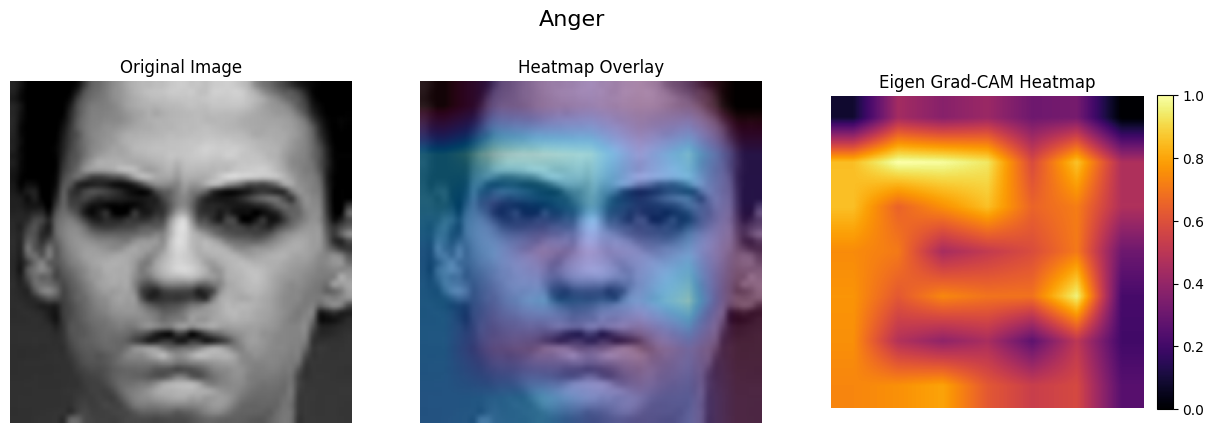

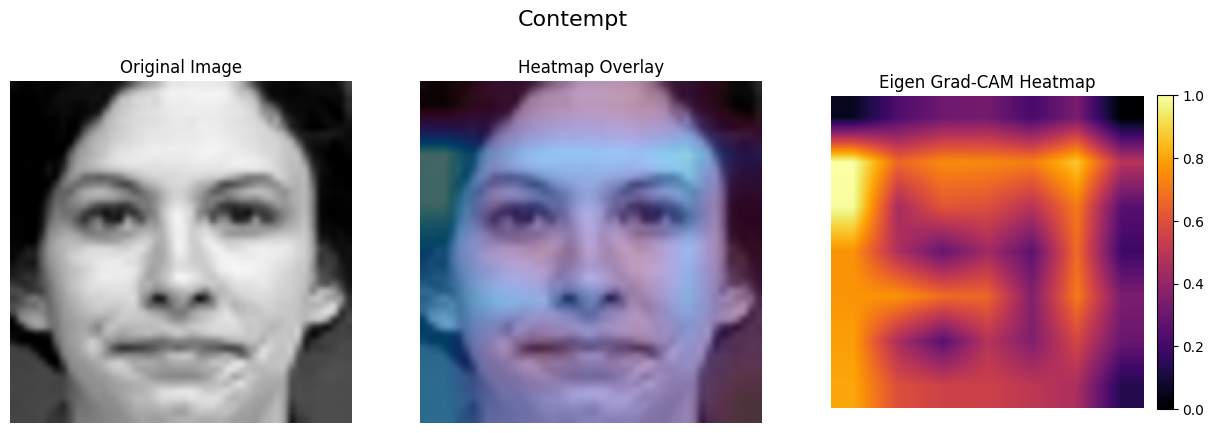

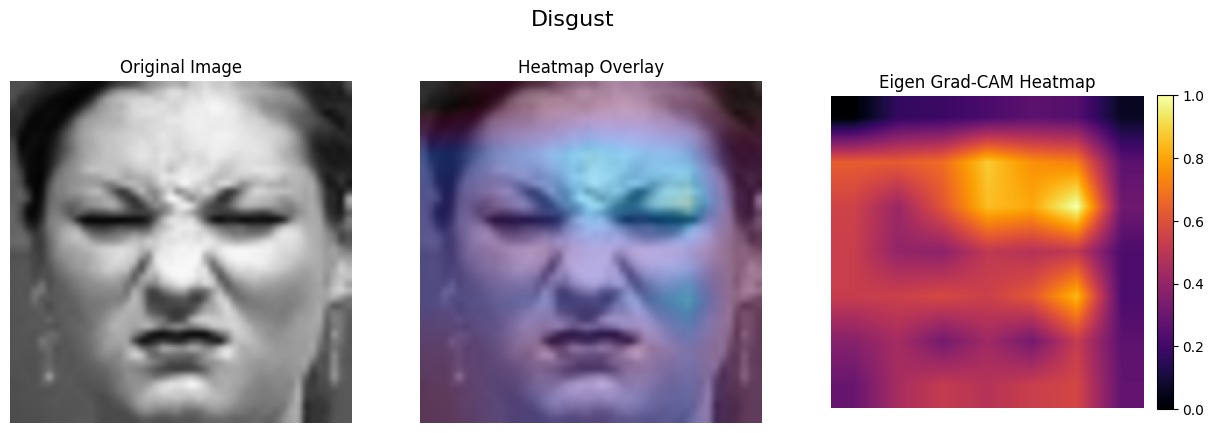

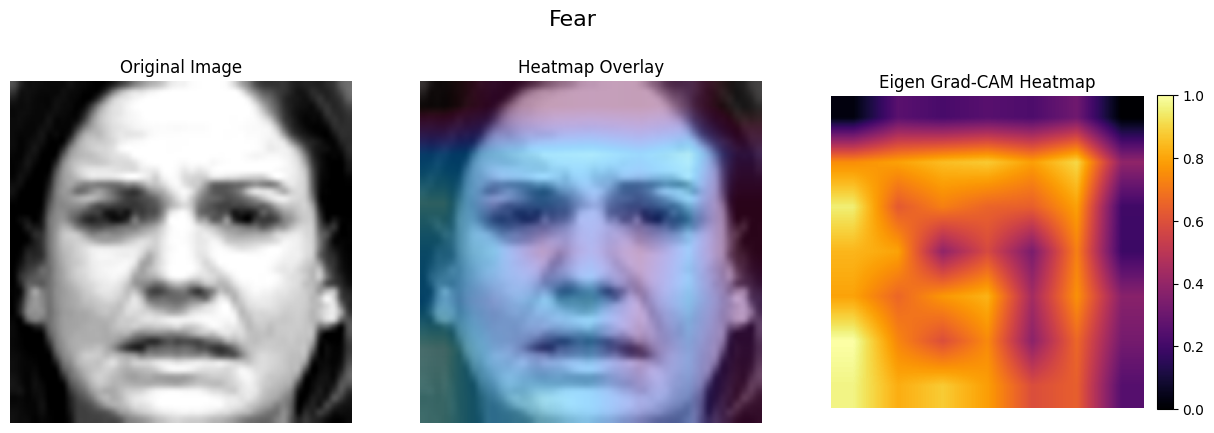

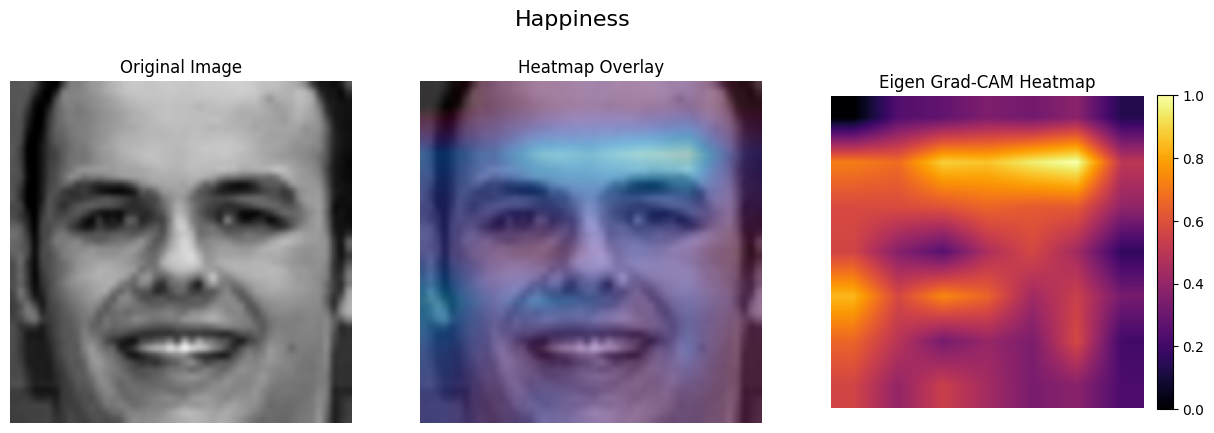

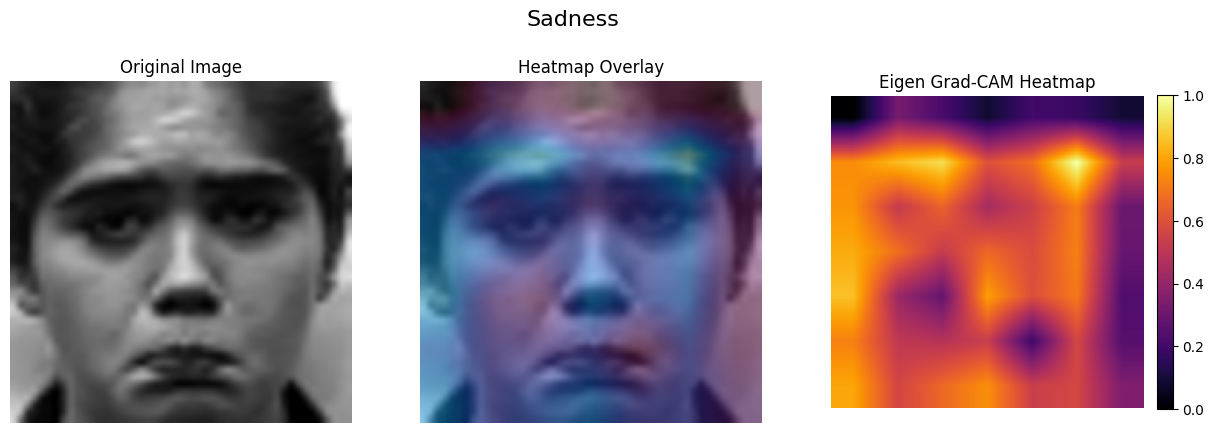

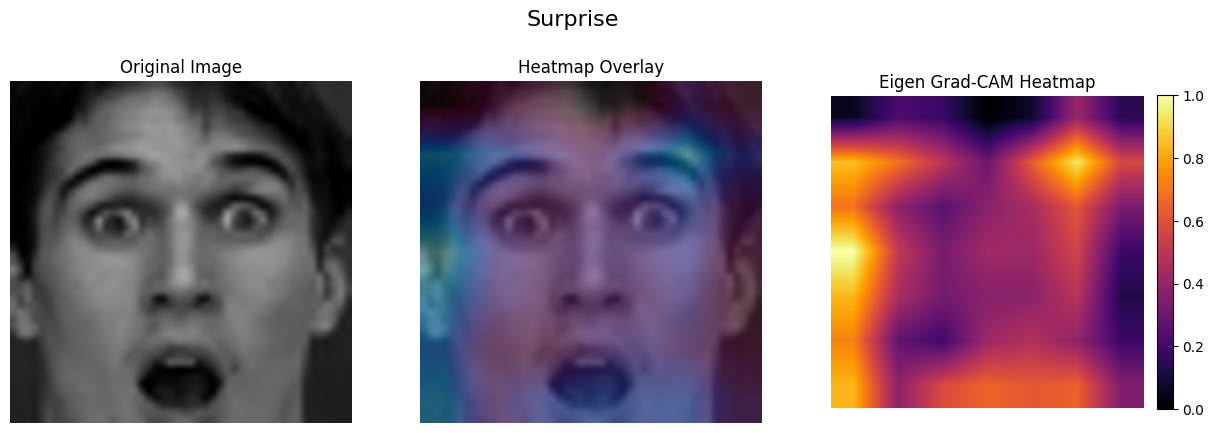

In [ ]:
emotion_images = ['anger', 'contempt', 'disgust', 'fear', 'happiness', 'sadness', 'surprise']

# Loop through images and generate visualizations
for emotion in emotion_images:
    img_path = os.path.join(image_folder, f"{emotion}.png")  # Assuming images are named like 'anger.png', etc.
    if not os.path.exists(img_path):
        continue  # Skip if the image doesn't exist

    # Load and preprocess the image
    img = Image.open(img_path).convert('RGB')
    input_tensor = transform(img).unsqueeze(0).to(device)

    # Generate Eigen Grad-CAM heatmap
    eigen_grad_cam_map = eigen_cam.generate(input_tensor)

    # Convert original and heatmap for visualization
    original_img = np.array(img.resize((224, 224)))
    heatmap = cv2.applyColorMap(np.uint8(255 * eigen_grad_cam_map), cv2.COLORMAP_INFERNO)
    heatmap_overlay = cv2.addWeighted(original_img, 0.6, heatmap, 0.4, 0)

    # Plot results
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(emotion.capitalize(), fontsize=16)

    # Original Image
    ax[0].imshow(original_img)
    ax[0].set_title('Original Image')
    ax[0].axis('off')

    # Heatmap Overlay
    ax[1].imshow(heatmap_overlay)
    ax[1].set_title('Heatmap Overlay')
    ax[1].axis('off')

    # Standalone Heatmap with color bar
    heatmap_img = ax[2].imshow(eigen_grad_cam_map, cmap='inferno')
    ax[2].set_title('Eigen Grad-CAM Heatmap')
    ax[2].axis('off')
    fig.colorbar(heatmap_img, ax=ax[2], fraction=0.046, pad=0.04)

    plt.show()

In [ ]:
emotion_images = ['anger', 'contempt', 'disgust', 'fear', 'happiness', 'sadness', 'surprise']
results = {}

for emotion in emotion_images:
    img_path = os.path.join(image_folder, f"{emotion}.png")
    img = Image.open(img_path).convert('RGB')
    input_tensor = transform(img).unsqueeze(0).to(device)

    # Get EigenGradCAM heatmap
    eigen_cam_map = eigen_cam.generate(input_tensor)

    # Convert the original and heatmap to numpy for plotting
    original_img = np.array(img.resize((224, 224)))
    heatmap = cv2.applyColorMap(np.uint8(255 * eigen_cam_map), cv2.COLORMAP_INFERNO)
    heatmap_overlay = cv2.addWeighted(original_img, 0.6, heatmap, 0.4, 0)

    # Store images for visualization
    results[emotion] = (original_img, heatmap_overlay, heatmap)

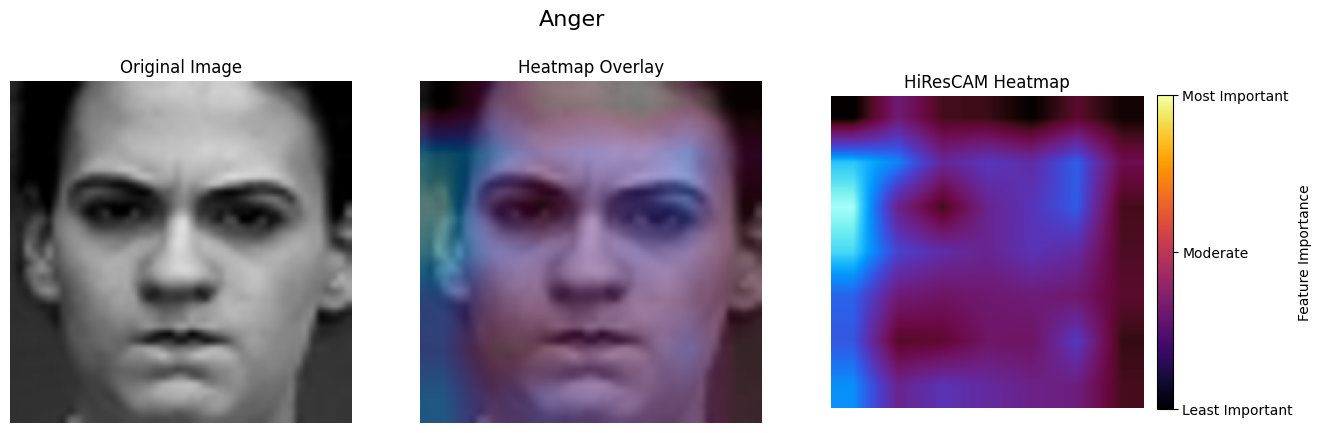

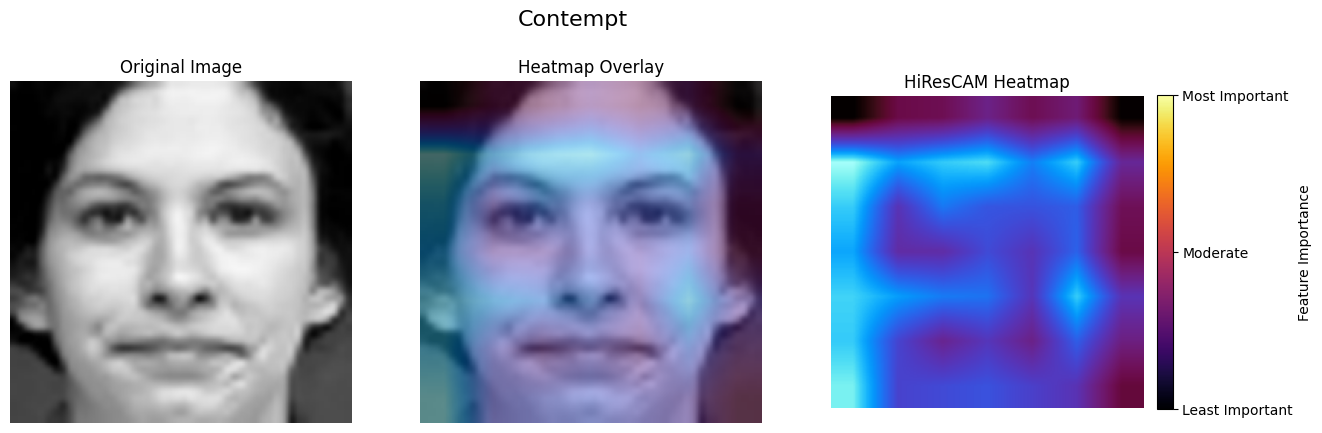

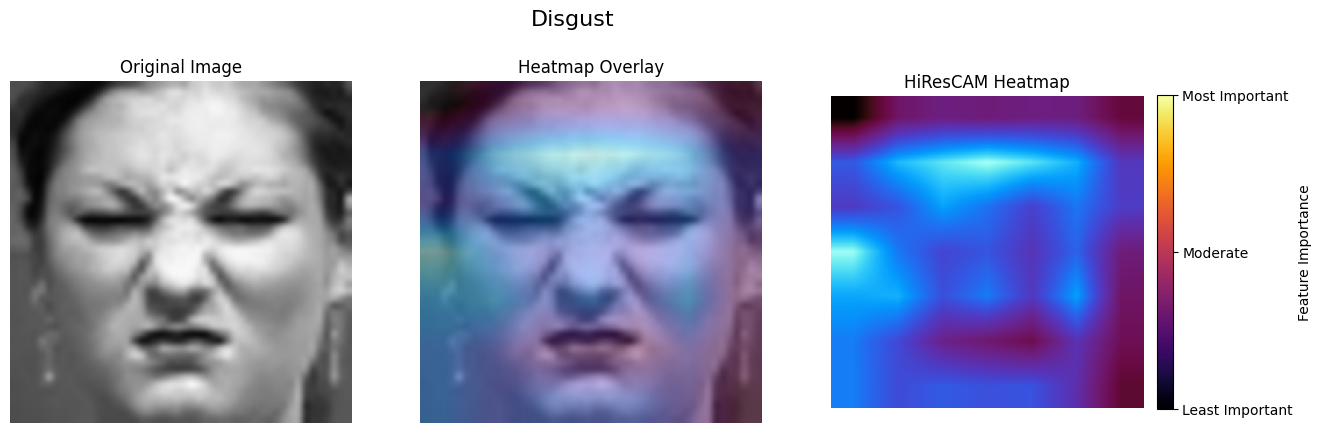

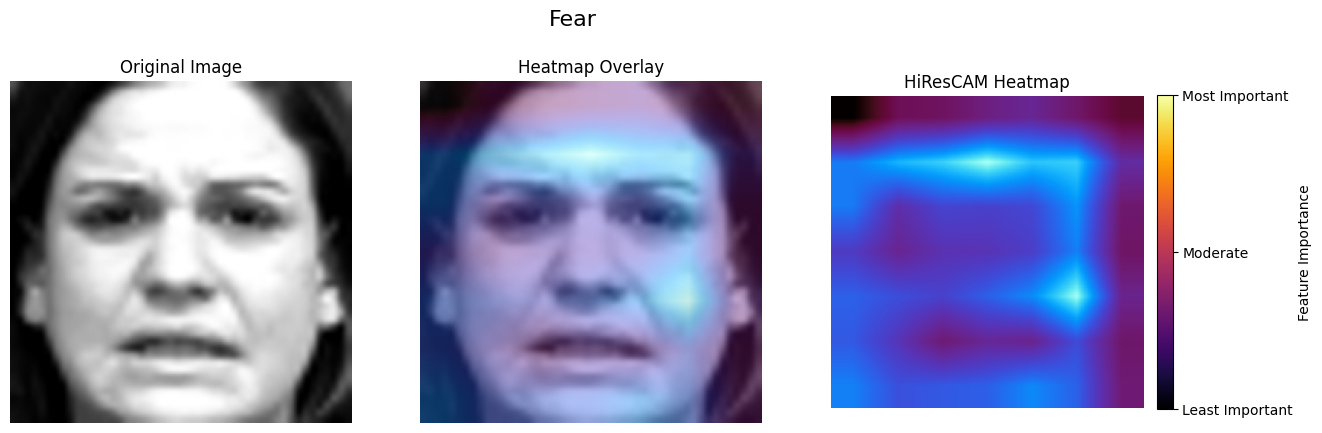

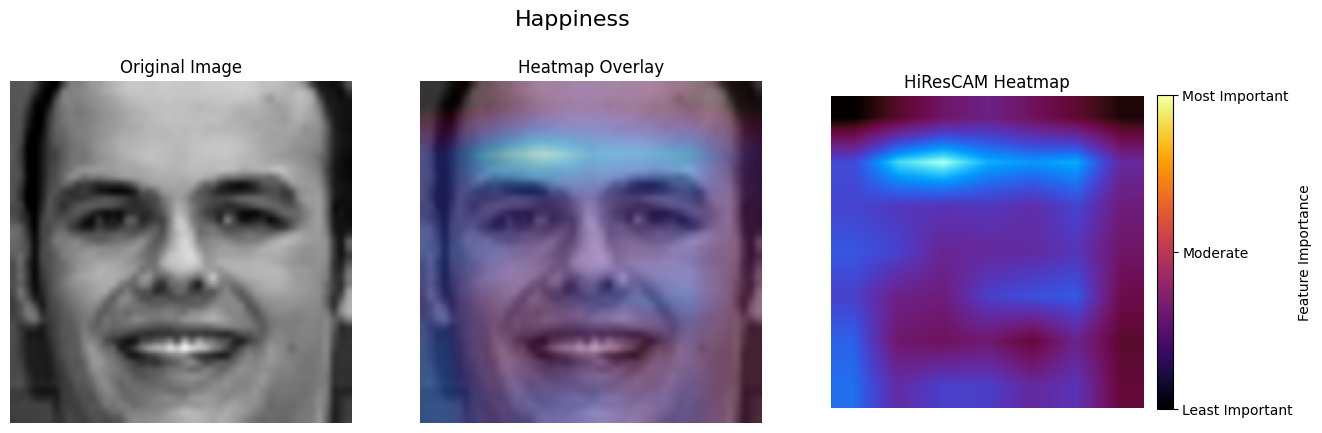

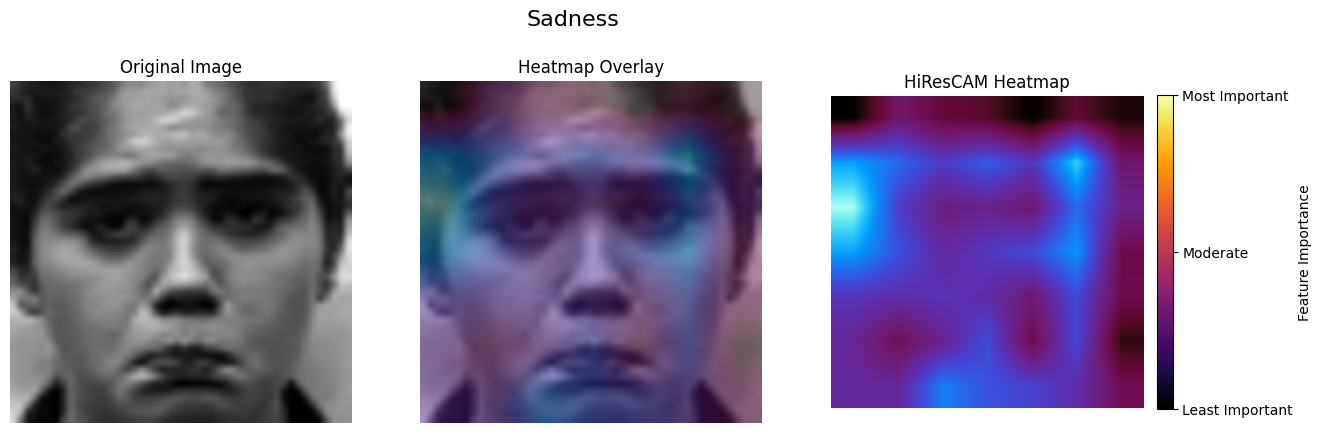

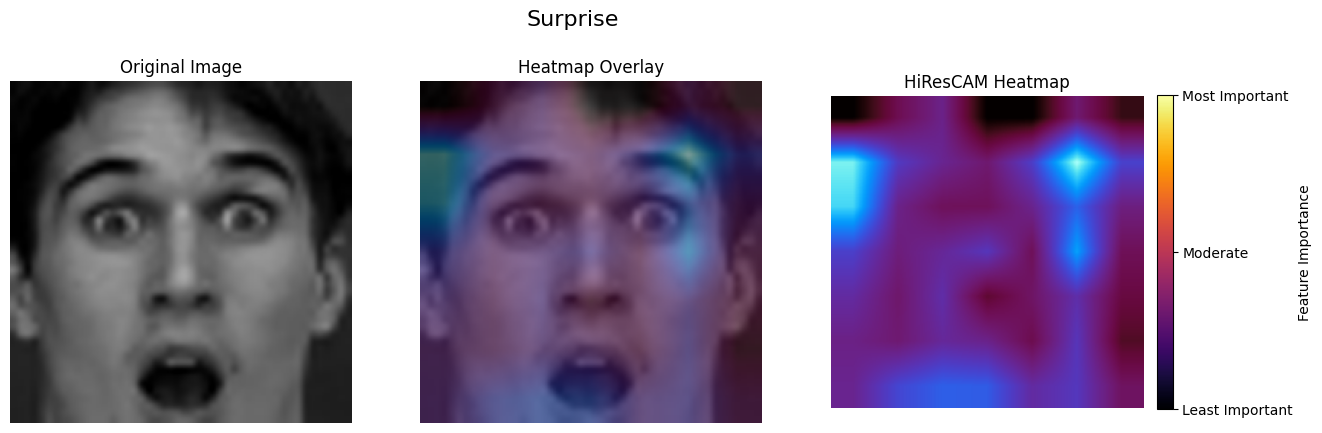

In [ ]:
# Plotting with colorbar
for emotion, (original_img, heatmap_overlay, heatmap) in results.items():
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(emotion.capitalize(), fontsize=16)

    # Original Image
    ax[0].imshow(original_img)
    ax[0].set_title('Original Image')
    ax[0].axis('off')

    # Heatmap Overlay
    ax[1].imshow(heatmap_overlay)
    ax[1].set_title('Heatmap Overlay')
    ax[1].axis('off')

    # Standalone Heatmap with Colorbar (using 'inferno' colormap)
    heatmap_img = ax[2].imshow(heatmap, cmap='inferno')
    ax[2].set_title('HiResCAM Heatmap')
    ax[2].axis('off')

    # Add colorbar matching the 'inferno' colormap
    cbar = fig.colorbar(heatmap_img, ax=ax[2], fraction=0.046, pad=0.04)
    cbar.set_label('Feature Importance')
    cbar.set_ticks([0, 127.5, 255])
    cbar.set_ticklabels(['Least Important', 'Moderate', 'Most Important'])

    plt.show()

In [ ]:
'''class EigenGradCAM:
    def __init__(self, model, target_layer):
        """
        Initializes the EigenGradCAM with a model and target layer.

        Parameters:
        - model (torch.nn.Module): The neural network model
        - target_layer (torch.nn.Module): The target layer to visualize (usually the last conv layer)
        """
        self.model = model
        self.target_layer = target_layer
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.model.to(self.device)
        self.model.eval()  # Set the model to evaluation mode

        # Preprocessing function
        self.preprocess = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])

        # Hooks to save gradients and activations
        self.gradients = None
        self.activations = None
        self.target_layer.register_forward_hook(self.save_activation)
        self.target_layer.register_backward_hook(self.save_gradient)

    def save_activation(self, module, input, output):
        """Save the output (activation) of the forward pass."""
        self.activations = output.detach()

    def save_gradient(self, module, grad_input, grad_output):
        """Save the gradient of the backward pass."""
        self.gradients = grad_output[0].detach()

    def generate_cam(self, image_tensor):
        """
        Generates the Eigen Grad-CAM for a single image tensor.

        Parameters:
        - image_tensor (torch.Tensor): The preprocessed image tensor

        Returns:
        - cam (np.array): The generated CAM heatmap
        """
        image_tensor = image_tensor.to(self.device)
        output = self.model(image_tensor)
        class_idx = output.argmax(dim=1).item()

        # Backward pass to get gradients
        self.model.zero_grad()
        class_score = output[0, class_idx]
        class_score.backward(retain_graph=True)

        # Get gradients and activations
        gradients = self.gradients.cpu().numpy().squeeze()
        activations = self.activations.cpu().numpy().squeeze()

        # Reshape gradients for eigen decomposition
        gradients = gradients.reshape(gradients.shape[0], -1)  # (C, H*W)
        eig_vals, eig_vecs = np.linalg.eig(np.dot(gradients, gradients.T))  # Make it square

        # Select the principal eigenvector
        principal_eig = eig_vecs[:, np.argmax(eig_vals)]

        # Calculate CAM
        cam = np.dot(activations.transpose(1, 2, 0), principal_eig)  # Weighted sum over channels
        cam = np.maximum(cam, 0)  # ReLU
        cam = cv2.resize(cam, (224, 224))
        cam -= np.min(cam)
        cam /= np.max(cam)

        return cam'''

'class EigenGradCAM:\n    def __init__(self, model, target_layer):\n        """\n        Initializes the EigenGradCAM with a model and target layer.\n\n        Parameters:\n        - model (torch.nn.Module): The neural network model\n        - target_layer (torch.nn.Module): The target layer to visualize (usually the last conv layer)\n        """\n        self.model = model\n        self.target_layer = target_layer\n        self.device = torch.device(\'cuda\' if torch.cuda.is_available() else \'cpu\')\n        self.model.to(self.device)\n        self.model.eval()  # Set the model to evaluation mode\n\n        # Preprocessing function\n        self.preprocess = transforms.Compose([\n            transforms.Resize((224, 224)),\n            transforms.ToTensor(),\n            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])\n        ])\n\n        # Hooks to save gradients and activations\n        self.gradients = None\n        self.activations = None\n        sel